In [0]:
def C_E (p,q):
    foo = []
    for i,j in enumerate(q):
        foo.append(p[i]*math.log(j))
    return -sum(foo)

In [0]:
-np.sum(np.outer(P,np.log(Q)).diagonal())

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import metrics
import math
%matplotlib inline  

In [0]:
with open('../json_parts/MAIN_CLOZE_NODE.json','r',encoding='utf8') as fd:
    JSON_CLOZE = json.load(fd)

In [0]:
JSON_CLOZE.__len__()

1219

In [0]:
with open('../json_parts/MAIN_2HMM_NODE.json','r',encoding='utf8') as fd:
    JSON_HMM = json.load(fd)

In [0]:
JSON_HMM.__len__()

1219

In [0]:
with open('../json_parts/MAIN_MAIN_NODE.json','r',encoding='utf8') as fd:
    JSON_LSTM = json.load(fd)

In [0]:
JSON_LSTM.__len__()

1219

# (sic!)  Данные в случае p=cloze, q=lstm - ошибка нормирования для lstm

### т.к. вокабуляр cloze << lstm 

In [0]:
from collections import defaultdict

def cross_entropy(json_P, json_Q, epsilon = .1**12, typ='cross'):
    
    ans = []
    
    for k in range(len(json_P)):

        P = []
        Q = []

        lstm_dict = defaultdict(int)
        for i,j in json_Q[k]['pred']:
            lstm_dict[i]=j

        for i,j in json_P[k]['pred']:
            P.append(j or epsilon)
            Q.append(lstm_dict[i] or epsilon)
            
        if typ == 'cross':
            ans.append(-np.sum(np.outer(P,np.log(Q)).diagonal()))
            
        if typ == 'KLD':
            ans.append(np.sum(np.outer(P,np.log(np.array(P) / np.array(Q) )).diagonal()))
            
        #DON'T WORK
        if typ == 'perp':
            ans.append( 2**(-np.sum(np.outer(P,np.log2(Q)).diagonal())) )

    return ans

## Проверка с вокабуляром от клоз (клоз-лстм)

In [0]:
teta = cross_entropy(JSON_CLOZE,JSON_LSTM,typ='KLD')

In [0]:
np.mean(teta)

5.646352833785964

## Проверка с вокабуляром от лстм (клоз-лстм)

In [0]:
teta = cross_entropy(JSON_LSTM,JSON_CLOZE,typ='KLD')

In [0]:
np.mean(teta)

15.466298819669527

## Проверка с вокабуляром от клоз (клоз-HMM)

In [0]:
teta = cross_entropy(JSON_CLOZE,JSON_HMM,typ='KLD')

In [0]:
np.mean(teta)

18.465957105100664

In [0]:
ax = sns.heatmap(flights, annot=True, fmt="d")

In [0]:
metatable = np.zeros((3, 3))

In [0]:
metatable

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [0]:
metatable[0][0] = np.mean(cross_entropy(JSON_CLOZE,JSON_CLOZE,typ='KLD'))
metatable[0][1] = np.mean(cross_entropy(JSON_CLOZE,JSON_LSTM,typ='KLD'))
metatable[0][2] = np.mean(cross_entropy(JSON_CLOZE,JSON_HMM,typ='KLD'))

metatable[1][0] = np.mean(cross_entropy(JSON_LSTM,JSON_CLOZE,typ='KLD'))
metatable[1][1] = np.mean(cross_entropy(JSON_LSTM,JSON_LSTM,typ='KLD'))
metatable[1][2] = np.mean(cross_entropy(JSON_LSTM,JSON_HMM,typ='KLD'))

metatable[2][0] = np.mean(cross_entropy(JSON_HMM,JSON_CLOZE,typ='KLD'))
metatable[2][1] = np.mean(cross_entropy(JSON_HMM,JSON_LSTM,typ='KLD'))
metatable[2][2] = np.mean(cross_entropy(JSON_HMM,JSON_HMM,typ='KLD'))

In [0]:
import seaborn as sns, numpy as np
sns.set()

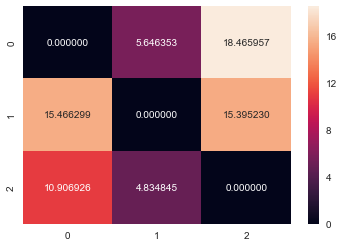

In [0]:
bx = sns.heatmap(metatable, annot=True, fmt="f")

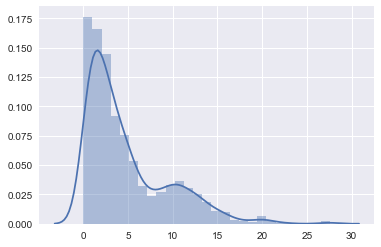

In [0]:
import seaborn as sns, numpy as np
sns.set()

ax = sns.distplot(cross_entropy(JSON_HMM,JSON_LSTM,typ='KLD'))
ax

### ЛСТМ больше похожа на HMM, чем на клоз таск, удивительно, не правда ли ?

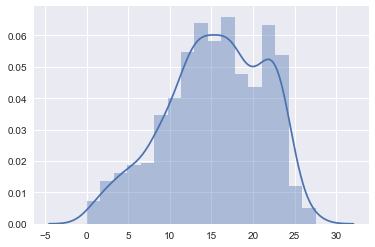

In [0]:
ax = sns.distplot(cross_entropy(JSON_LSTM,JSON_HMM,typ='KLD'))
ax